# CIFAR-100 Images Classification using Convolutional Neural Networks

## The dataset contains 60000 32*32 color images. 

## Problem Statement : 
### Build a convolutional neural network to classify the images in the dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

# i will be building the model in a sequential fashion
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from keras.datasets import cifar100


In [3]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

## 2. Visualizations and Data pre-processing

Class :  [73]


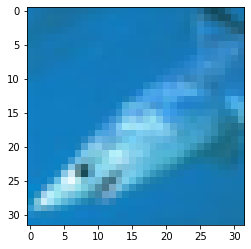

In [8]:
plt.imshow(X_train[50])
print("Class : ", y_train[50])

Class :  [92]


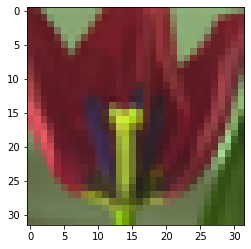

In [9]:
plt.imshow(X_test[2000])
print("Class : ", y_test[2000])

C:\Users\HemanthG\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


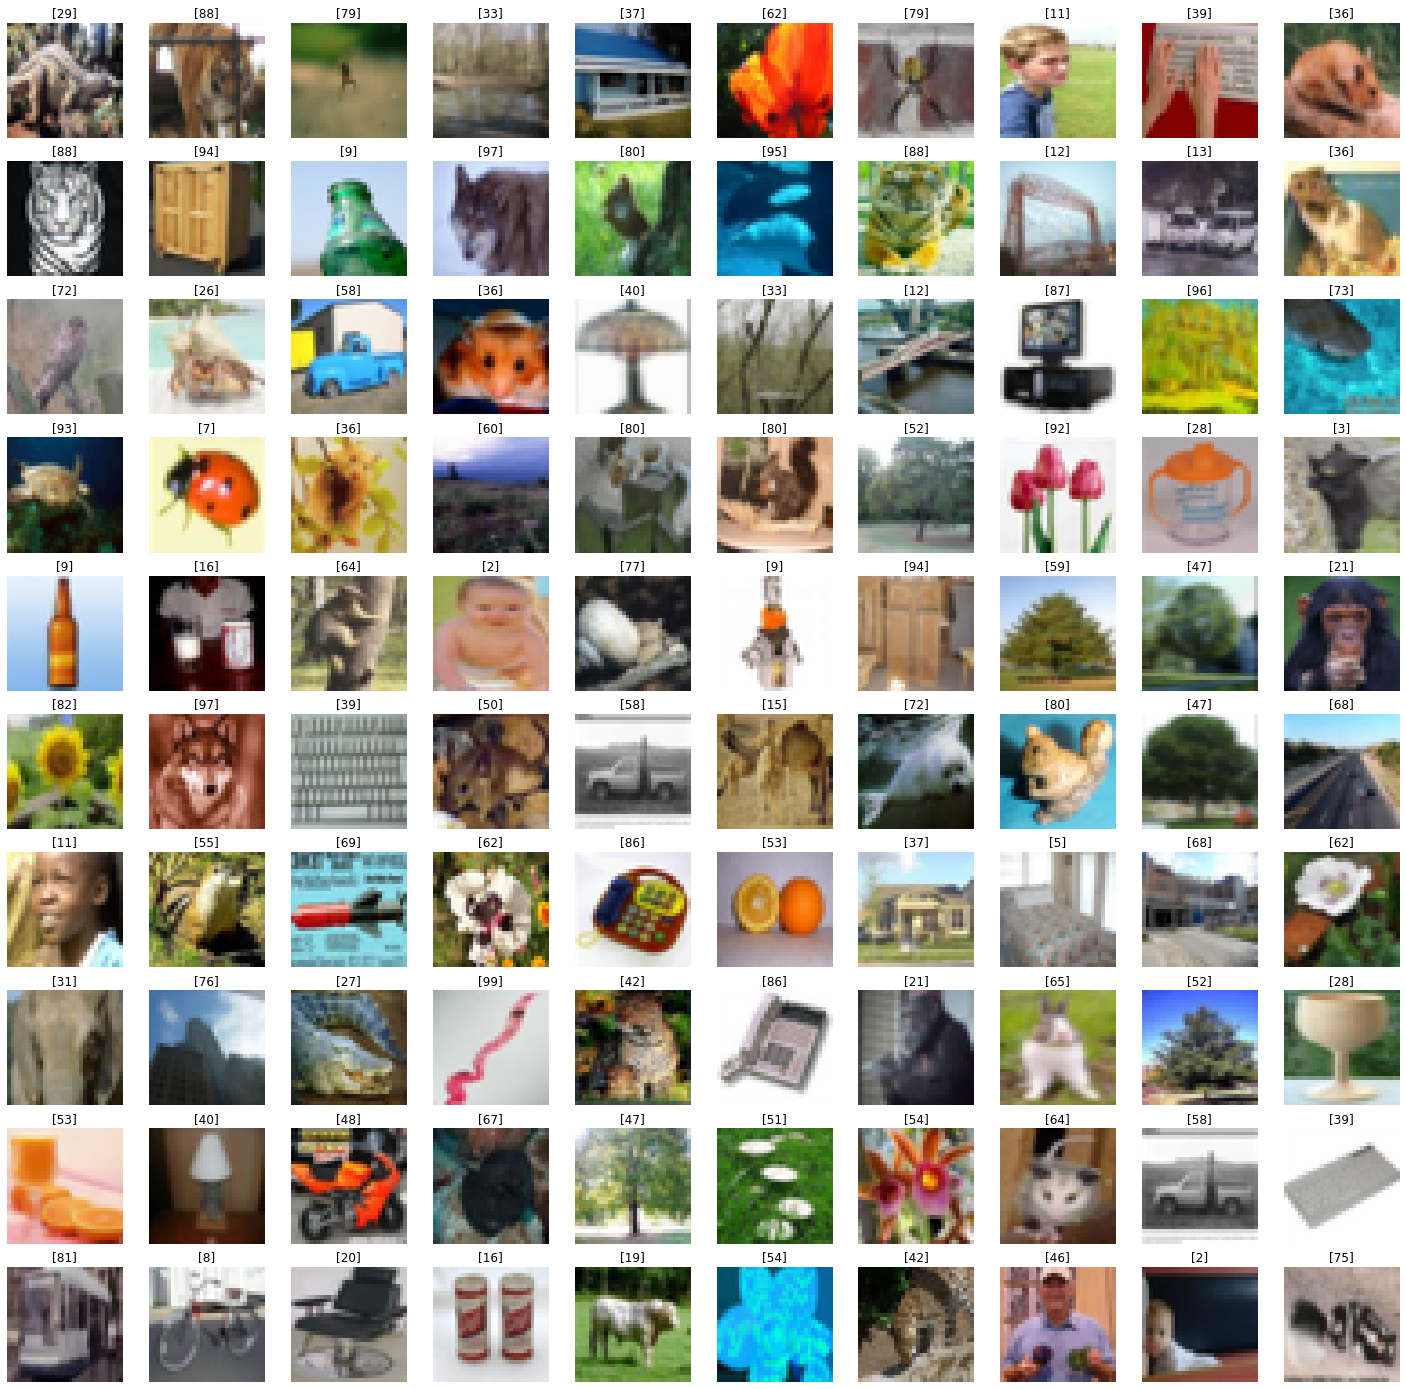

In [10]:
fig, axes = plt.subplots(10,10, figsize = (25,25))
axes = axes.ravel()
for i in np.arange(100):
    # idx is a random interger in range len(X_train)
    idx = np.random.randint(1, len(X_train))
    axes[i].imshow(X_train[idx])
    axes[i].set_title(y_train[idx])
    axes[i].axis('off')  

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# now i am going to normalize the X_train and X-test by dividing the pixel values by 255
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7647059 , 0.8039216 , 0.75686276],
         [0.83137256, 0.8784314 , 0.8       ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.6666667 , 0.6901961 , 0.5882353 ],
         [0.6313726 , 0.65882355, 0.50980395],
         [0.57254905, 0.6039216 , 0.44313726]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7411765 , 0.78039217, 0.6627451 ],
         [0.6509804 , 0.69803923, 0.50980395],
         [0.4745098 , 0.52156866, 0.34117648]],

        ...,

        [[0.5803922 , 0.7254902 , 0.30980393],
         [0.5568628 , 0.7137255 , 0.22352941]

In [13]:
X_test

array([[[[0.78039217, 0.84313726, 0.9764706 ],
         [0.76862746, 0.827451  , 0.95686275],
         [0.7647059 , 0.8235294 , 0.9529412 ],
         ...,
         [0.84705883, 0.90588236, 0.98039216],
         [0.8509804 , 0.90588236, 0.98039216],
         [0.8784314 , 0.91764706, 0.9882353 ]],

        [[0.77254903, 0.8235294 , 0.9372549 ],
         [0.7647059 , 0.8156863 , 0.93333334],
         [0.7647059 , 0.8235294 , 0.9411765 ],
         ...,
         [0.90588236, 0.9529412 , 0.98039216],
         [0.9137255 , 0.9529412 , 0.98039216],
         [0.94509804, 0.9607843 , 0.99215686]],

        [[0.87058824, 0.8862745 , 0.9647059 ],
         [0.8352941 , 0.8627451 , 0.9490196 ],
         [0.81960785, 0.85882354, 0.9529412 ],
         ...,
         [0.9529412 , 0.98039216, 0.9843137 ],
         [0.95686275, 0.9764706 , 0.9843137 ],
         [0.98039216, 0.98039216, 0.99215686]],

        ...,

        [[0.28235295, 0.28627452, 0.3882353 ],
         [0.2784314 , 0.2901961 , 0.4       ]

In [14]:
# Since we converted the X_train and X_test to decimal values the actual classes become decimal values so we need to convert
# the y_train and Y_test to decimal but these are classes which are categorical so i am going to convert from decimal
# format to binary format Now if i train the convolution i can get the class directly.
# For Exxample lets say if i feed in a deer which is class 4 it should find the first neuron or just the first output firing
# Which means that firing will be the image corresponding to that specific class.

y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
input_dim = X_train.shape[1:] 
print(input_dim)

(32, 32, 3)


#### Ok now that the data looks great lets train the model
## 3. Build, Train, Evaluate and save the model

In [36]:
model = Sequential()

# First convolution layer( 2D convolution) with 64 filters and the kernal size for each filter would be 4*4 matrix and the
# activation function will be Rectified Linear Units(ReLu) with the input dimensions unchanged.

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = input_dim))

# secong convolution layer with almost the same features as the first layer

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))

# Now that the images are convoluted  the nest step would be pooling to downsampling

model.add(MaxPooling2D(2,2))

# Now drop some(25%) of the neurons which do not affect the performance(useless) of the NN. This is called Dropout

model.add(Dropout(0.40))

In [37]:
# Now that the first layer of convolutions are done lets stack the convolutions to increase the depth of the model
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.30))

In [38]:
# Now that the DownSampling is done lets prepare the new data to feed the Neural Network. This is Flattening.
# Then create a fully connected NN so i am going to use Dense to create so.
model.add(Flatten())
model.add(Dense(units = 1024, activation = 'relu')) # First hidden layer
model.add(Dense(units = 1024, activation = 'relu')) # second hidden layer
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 100, activation = 'softmax')) # output layer so 10 neurons and relu can not be used.

#### Ok! lets compile the model

In [39]:
# since we are using categorical values i am going use the categorical cross entropy as my loss function
# And for speed of the NN i am going to use the "Acc" as my metric

model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['acc'])

#### Now that the model is compiled lets fit the network

In [40]:
# batch size is how many images are being fed to the network
# epochs are only 10 because i am running on the CPU it would take a long time to fit the model with high number of epochs
# shuffle is TRUE because i dont want the model to get the images with same class everytime.

model_his = model.fit(X_train, y_train, batch_size = 32, epochs = 30, shuffle = True)

Epoch 1/30
1563/1563 [==============================] - 197s 126ms/step - loss: 4.3853 - acc: 0.0318
Epoch 2/30
1563/1563 [==============================] - 195s 125ms/step - loss: 3.6290 - acc: 0.1430
Epoch 3/30
1563/1563 [==============================] - 195s 125ms/step - loss: 3.2059 - acc: 0.2230
Epoch 4/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.9445 - acc: 0.2716
Epoch 5/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.7942 - acc: 0.3039
Epoch 6/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.6879 - acc: 0.3238
Epoch 7/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.6071 - acc: 0.3450
Epoch 8/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.5602 - acc: 0.3556
Epoch 9/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.4886 - acc: 0.3715
Epoch 10/30
1563/1563 [==============================] - 195s 125ms/step - loss: 2.4648 - a

#### Evaluating the Model

In [41]:
model_eval = model.evaluate(X_test, y_test)
print("Testing Accuracy = ", model_eval[1])

313/313 [==============================] - 8s 24ms/step - loss: 2.8250 - acc: 0.3586
Testing Accuracy =  0.358599990606308


In [42]:
pred = model.predict_classes(X_test)
pred

C:\Users\HemanthG\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([69, 96, 44, ..., 51, 42, 70], dtype=int64)

#### now that we have the predictions lets evaluate across Y_test

In [43]:
y_test.shape

(10000, 100)

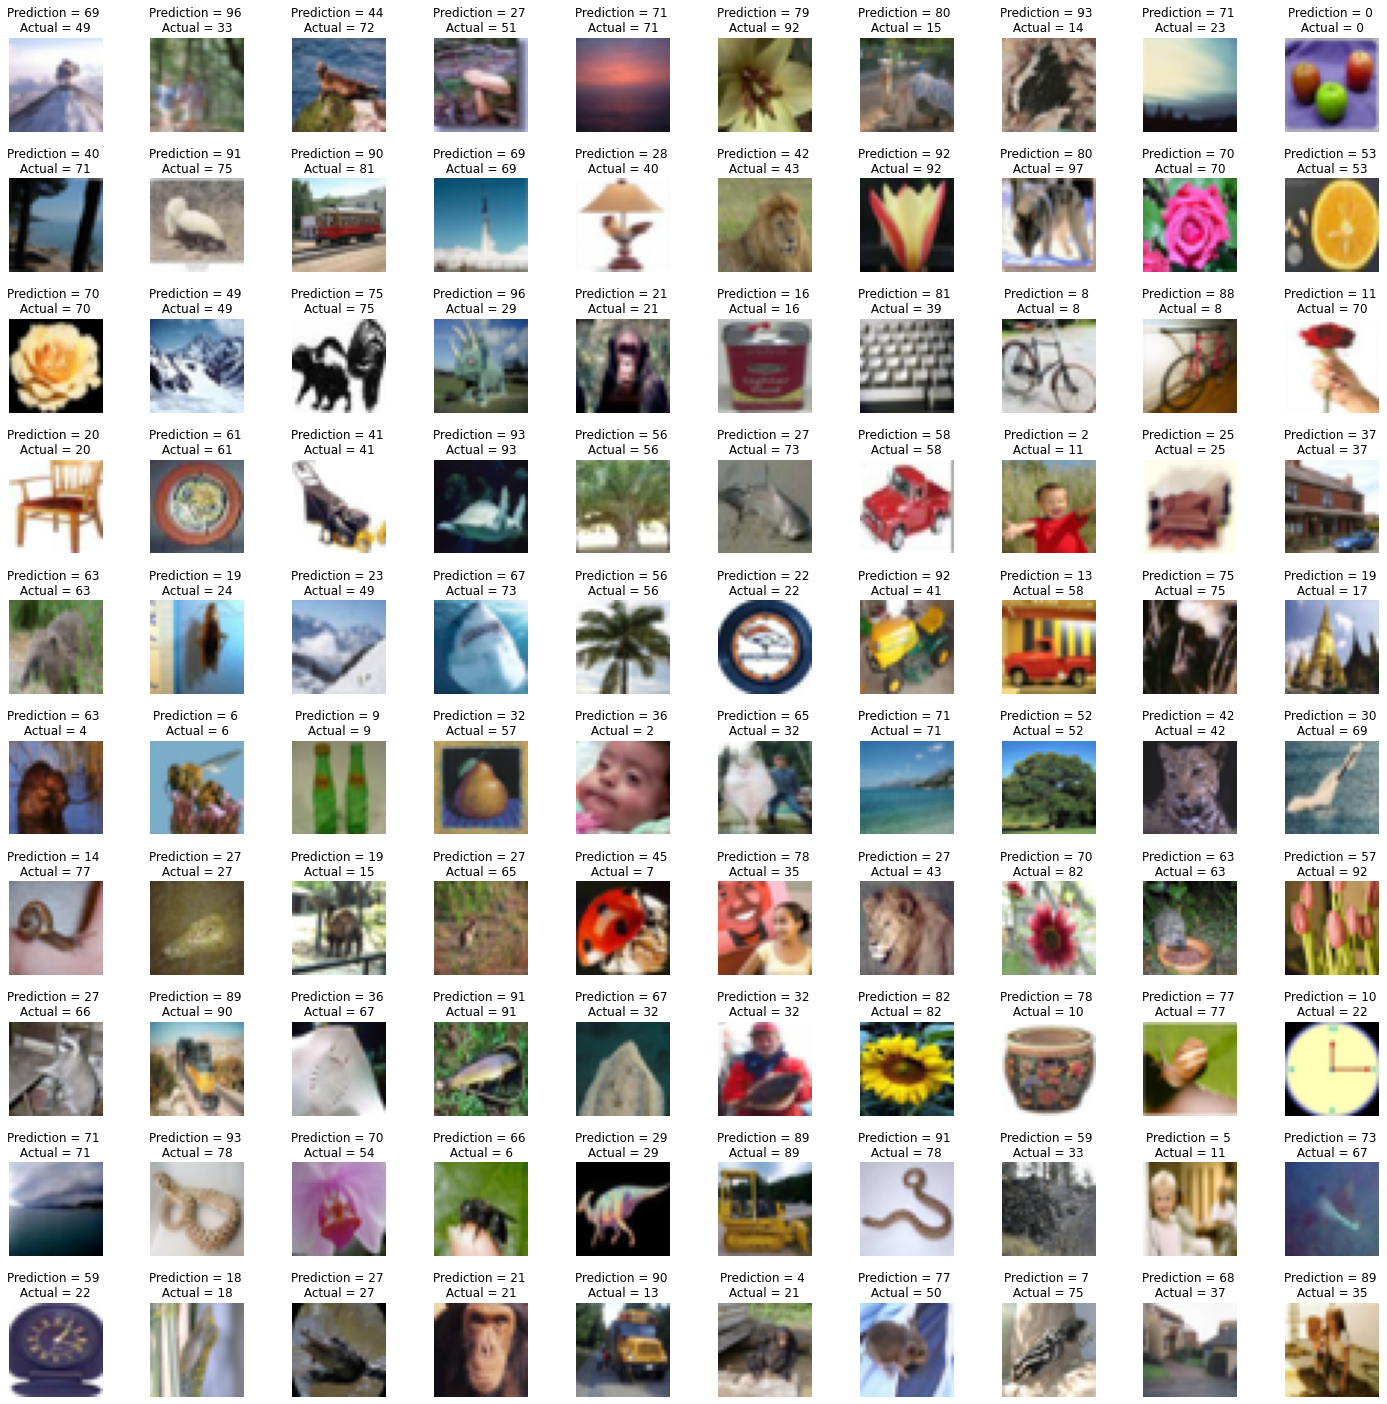

In [44]:
# first convert y_test from float to int
y_test = y_test.argmax(1)
# lets plot the results
fig, axes = plt.subplots(10,10,figsize = (25,25))
axes = axes.ravel()
for i in np.arange(100):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n Actual = {} '.format(pred[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.5)

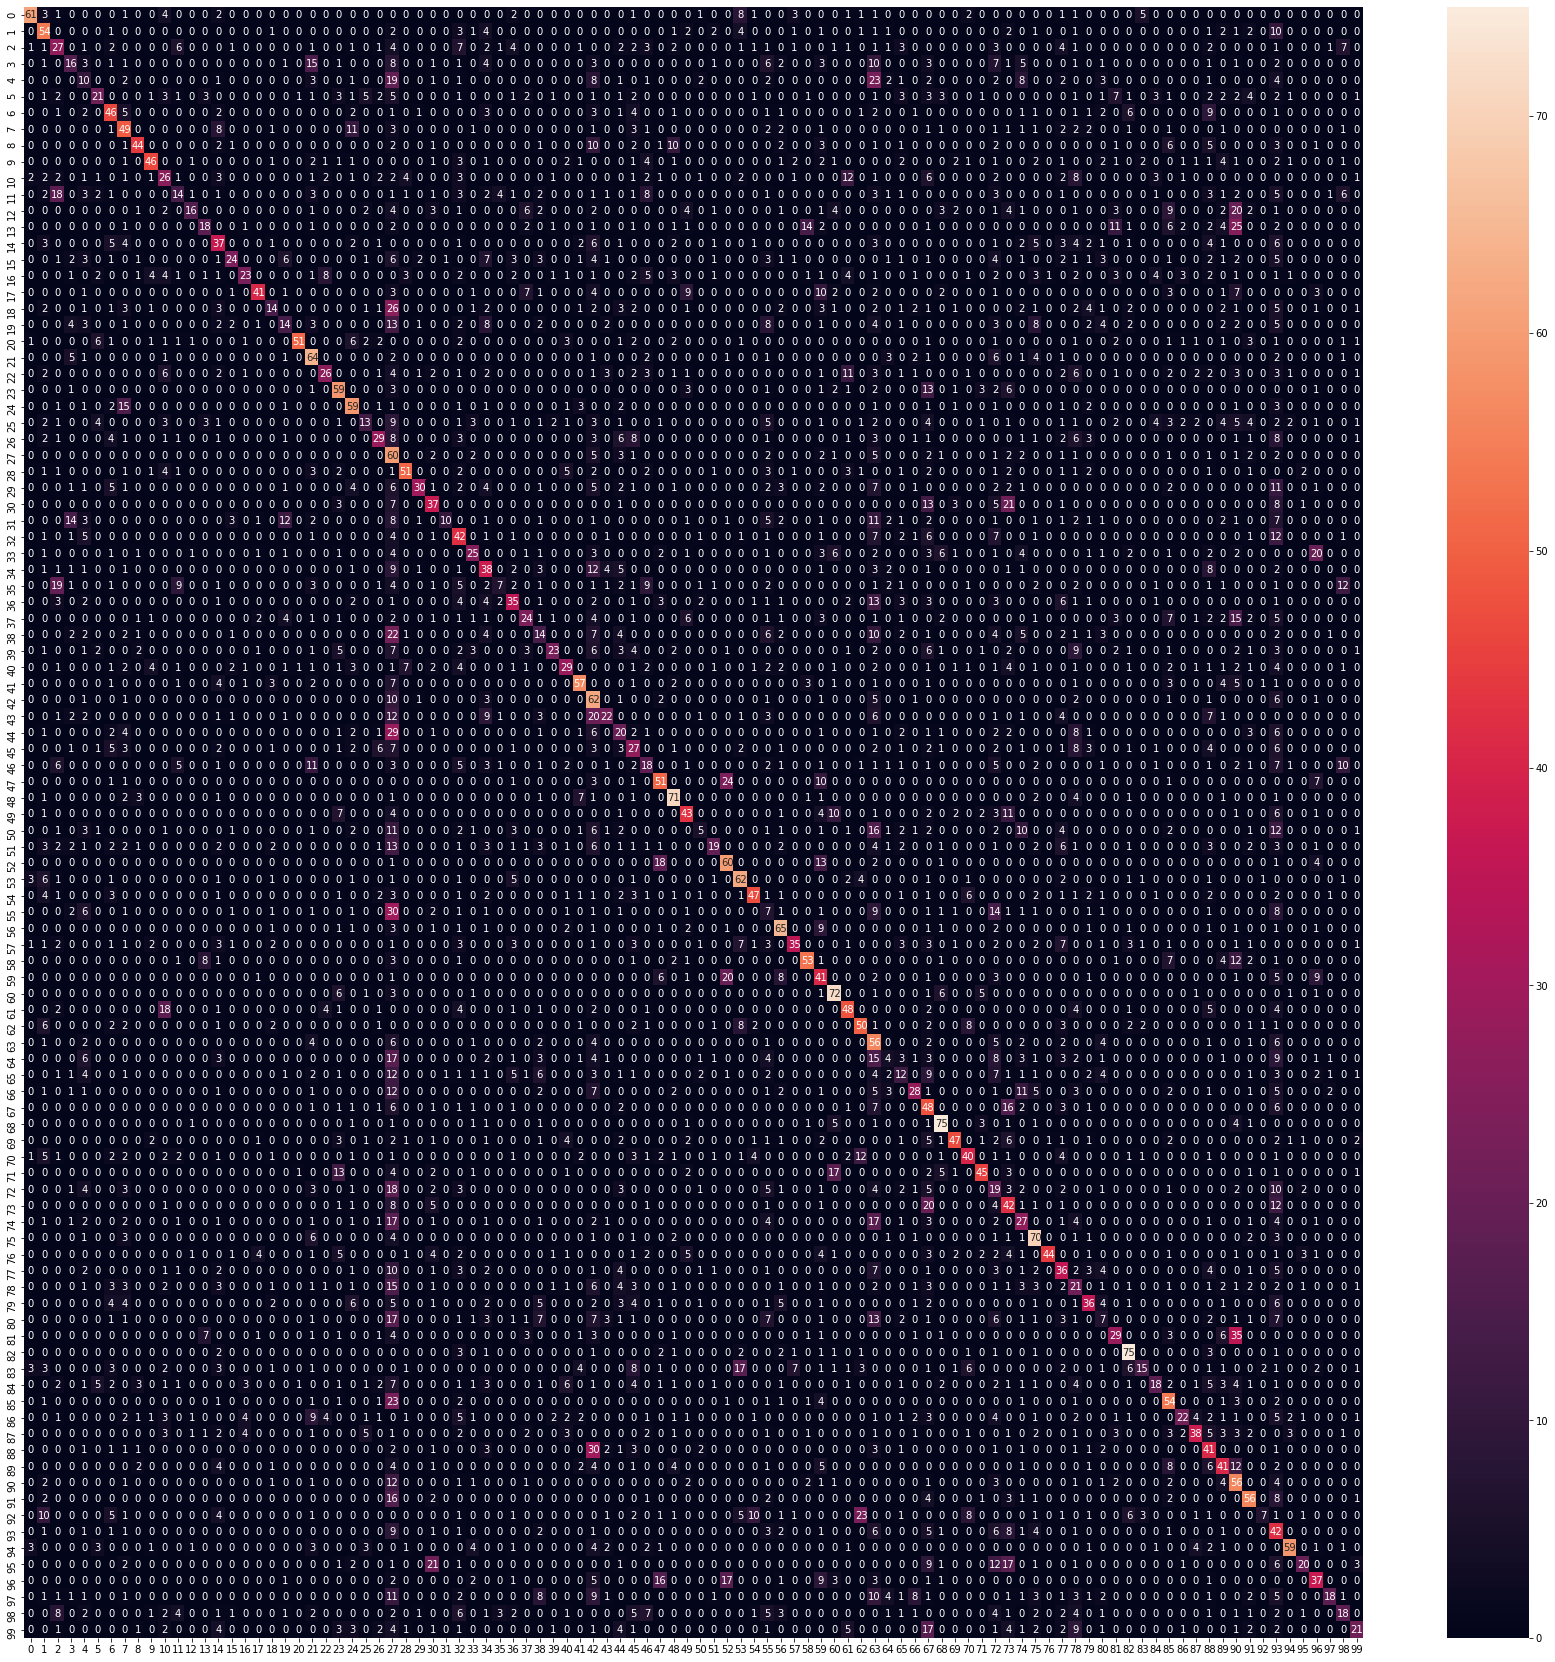

In [47]:
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, pred)
plt.figure(figsize=(30,30))
sns.heatmap(confusion_m,annot=True)

In [48]:
#path = os.path.join(directory, 'CIFER-10_trained_CNN-model.h5')
model.save('CIFER-100_trained_CNN-model.h5')